<a href="https://colab.research.google.com/github/rajendranast012-stack/in-silico-lab1/blob/main/K_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install rdkit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 41.0 MB/s eta 0:00:00


k=2, silhouette score=0.2781
k=3, silhouette score=0.3162
k=4, silhouette score=0.2659
k=5, silhouette score=0.2762
k=6, silhouette score=0.2665
k=7, silhouette score=0.2777
k=8, silhouette score=0.2410
k=9, silhouette score=0.2577
k=10, silhouette score=0.2627


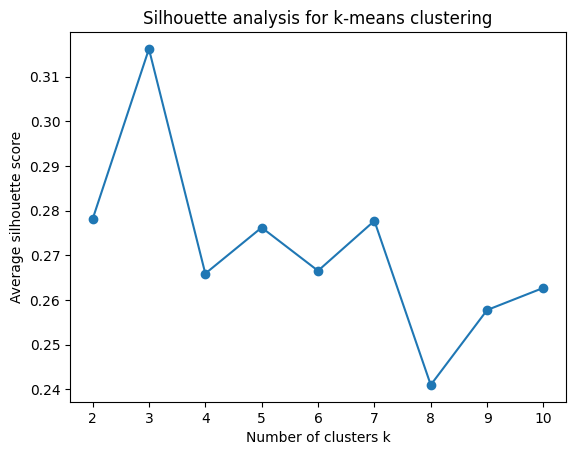

In [4]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- Step 1: Load your SMILES ---
df = pd.read_excel('/content/name.xlsx') # adjust path
smiles_list = df['SMILES'].tolist()  # replace 'SMILES' with your column name

# --- Step 2: Generate MACCS fingerprints ---
fps = []
for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        fp = MACCSkeys.GenMACCSKeys(mol)
        arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, arr)
        fps.append(arr)
fps = np.array(fps)

# --- Step 3: Run K-means and compute silhouette scores ---
sil_scores = []
K_range = range(2, 11)  # try k = 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(fps)
    score = silhouette_score(fps, labels)
    sil_scores.append(score)
    print(f"k={k}, silhouette score={score:.4f}")

# --- Step 4: Plot silhouette vs k ---
import matplotlib.pyplot as plt

plt.plot(K_range, sil_scores, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('Average silhouette score')
plt.title('Silhouette analysis for k-means clustering')
plt.show()


In [5]:
best_score = max(sil_scores)
best_k = K_range[sil_scores.index(best_score)]
print(f"\nBest k by silhouette score: {best_k}, score={best_score:.4f}")


Best k by silhouette score: 3, score=0.3162


Valid molecules: 187 / 187
Best k by silhouette: 3, score=0.3162


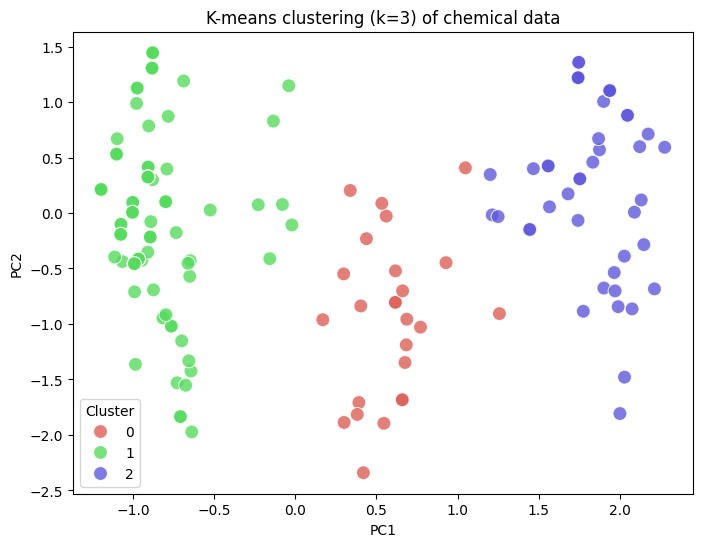

In [7]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load SMILES ---
df = pd.read_excel('/content/name.xlsx') # adjust path
smiles_list = df['SMILES'].tolist()  # replace 'SMILES' with your column name


# --- Step 2: Generate MACCS fingerprints ---
fps = []
valid_indices = []
for i, smi in enumerate(smiles_list):
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        fp = MACCSkeys.GenMACCSKeys(mol)
        arr = np.zeros((fp.GetNumBits(),), dtype=int)
        DataStructs.ConvertToNumpyArray(fp, arr)
        fps.append(arr)
        valid_indices.append(i)

fps = np.array(fps)
print(f"Valid molecules: {len(fps)} / {len(smiles_list)}")

# --- Step 3: Determine best k using silhouette score ---
sil_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(fps)
    score = silhouette_score(fps, labels)
    sil_scores.append(score)

best_score = max(sil_scores)
best_k = K_range[sil_scores.index(best_score)]
print(f"Best k by silhouette: {best_k}, score={best_score:.4f}")

# --- Step 4: Fit KMeans with best k ---
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans_best.fit_predict(fps)

# Assign cluster labels to dataframe
df_valid = df.iloc[valid_indices].copy()
df_valid['Cluster'] = cluster_labels

# --- Step 5: Reduce dimensions to 2D for plotting ---
pca = PCA(n_components=2, random_state=42)
fps_2d = pca.fit_transform(fps)

# --- Step 6: Plot clusters ---
plt.figure(figsize=(8,6))
palette = sns.color_palette("hls", best_k)
sns.scatterplot(x=fps_2d[:,0], y=fps_2d[:,1], hue=df_valid['Cluster'], palette=palette, s=100, alpha=0.8)
plt.title(f"K-means clustering (k={best_k}) of chemical data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()


In [8]:
!git clone https://github.com/rajendranast012-stack/in-silico-lab1.git
!git config --global user.email "rajendranast012@gmail.com"
!git config --global user.name "rajendranast012-stack"

Cloning into 'in-silico-lab1'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 1.90 MiB | 10.03 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [9]:
for c in range(best_k):
    print(f"\nCluster {c}:")
    print(df_valid[df_valid['Cluster'] == c]['SMILES'].tolist())



Cluster 0:
['CC1(C=CC2=C(O1)C=CC3=C2OC4C3COC5=C4C=CC(=C5)O)C', 'CC1(C=CC2=C(C3=C(C(=C2O1)CC=C)OC=C(C3=O)C4=CC(=C(C=C4)O)OC)O)C', 'CC(C)(CCC1=C2C(=C(C=C1O)O)C(=O)C(=C(O2)C3=CC=C(C=C3)O)O)O', 'CC1(C=CC2=C(C=C(C=C2O1)C3=CC4=C(O3)C=C(C=C4)O)O)C', 'CC1(C=CC2=C(C=C(C=C2O1)O)C3=CC4=C(O3)C=C(C=C4)O)C', 'CC1(CCC2=C(O1)C=C(C3=C2OC(=C(C3=O)O)C4=CC=C(C=C4)OC)O)C', 'CC(C)(CCC1=C2C(=C(C=C1O)O)C(=O)C(=C(O2)C3=CC=C(C=C3)OC)O)OC', 'CC1(C=CC2=C(C=CC(=C2O1)C3COC4=CC(=CC(=C4C3=O)O)O)O)C', 'CC1(C=CC2=C(O1)C=CC3=C2OC(=O)C(=C3)C4=C(C=C(C=C4)O)O)C', 'CC(C)(C1CC2=C(O1)C=C3C(=C2OC)C=C(C(=O)O3)C4=C(C=C(C=C4)O)O)O', 'CC1(C=CC2=C(O1)C(=CC(=C2)C3=COC4=CC(=CC(=C4C3=O)O)O)O)C', 'CC1(C=CC2=C(O1)C=CC(=C2O)C3CC4=C(C=C(C=C4)O)OC3)C', 'CC(C)(C=C)C1=C2C(=C(C=C1O)OC)C=C(C(=O)O2)C3=C(C=C(C=C3)O)O', 'CC1(C=CC2=C(O1)C=CC(=C2O)C3=COC4=CC(=CC(=C4C3=O)O)O)C', 'CC1(C=CC2=C(O1)C=CC(=C2O)C3COC4=CC(=CC(=C4C3=O)O)O)C', 'CC1(C=CC2=C(O1)C=CC3=C2OCC4C3OC5=C4C=CC(=C5)O)C', 'CC1(CCC2=C(O1)C=C3C(=C2OC)C=C(C(=O)O3)C4=C(C=C(C=C4)O)O)CO', 'CC

Step B: Compute cluster-level properties

Examples:

Number of hydroxyl groups

Molecular weight

LogP or other descriptors

In [13]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# --- Load your clustered data ---
# df_valid should have columns: 'SMILES' and 'Cluster' from previous steps
df = pd.read_excel('/content/name.xlsx') # adjust path

# --- Define functions for chemical properties ---
def count_oh(mol):
    """Count hydroxyl (-OH) groups"""
    return len(mol.GetSubstructMatches(Chem.MolFromSmarts('[OX2H]')))

def count_oCH3(mol):
    """Count methoxy (-OCH3) groups"""
    return len(mol.GetSubstructMatches(Chem.MolFromSmarts('CO')))

def count_glycoside(mol):
    """Count simple glycosidic patterns: -O-C1-O-C1- (sugar-like)"""
    # Using pyranose-like pattern: C-O-C-O
    return len(mol.GetSubstructMatches(Chem.MolFromSmarts('C-O-C-O')))

# --- Compute properties for each molecule ---
properties = []
for smi in df_valid['SMILES']:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        oh_count = count_oh(mol)
        oCH3_count = count_oCH3(mol)
        glyco_count = count_glycoside(mol)
        properties.append([mw, logp, oh_count, oCH3_count, glyco_count])
    else:
        properties.append([None, None, None, None, None])

# --- Add properties to dataframe ---
df_valid[['MolWt', 'LogP', 'OH_count', 'OCH3_count', 'Glycoside_count']] = properties

# --- Compute cluster-level statistics ---
cluster_summary = df_valid.groupby('Cluster').agg({
    'MolWt': ['mean', 'std', 'min', 'max'],
    'LogP': ['mean', 'std', 'min', 'max'],
    'OH_count': ['mean', 'std', 'min', 'max'],
    'OCH3_count': ['mean', 'std', 'min', 'max'],
    'Glycoside_count': ['mean', 'std', 'min', 'max'],
    'SMILES': 'count'
}).rename(columns={'SMILES': 'Count'})

# --- Save results ---
cluster_summary.to_excel("cluster_properties_summary.xlsx")
df_valid.to_excel("cluster_properties_per_molecule.xlsx", index=False)

print("Cluster summary and per-molecule properties saved!")
print(cluster_summary)


Cluster summary and per-molecule properties saved!
              MolWt                                   LogP                    \
               mean        std      min      max      mean       std     min   
Cluster                                                                        
0        351.412680  27.001094  308.333  406.434  3.938024  0.511638  2.9542   
1        319.196939  46.507909  254.241  610.521  2.674574  0.682189 -1.6871   
2        382.242362  85.352941  290.362  792.784  4.126430  1.296991 -1.1744   

                  OH_count            ...       OCH3_count                 \
             max      mean       std  ...   max       mean       std  min   
Cluster                               ...                                   
0        4.79250  2.280000  0.890693  ...   5.0   2.040000  0.840635  1.0   
1        4.39386  2.495652  1.629627  ...  10.0   2.104348  2.023433  0.0   
2        6.75480  3.191489  1.663395  ...   9.0   1.680851  3.545397  0.0   

     

For each cluster, you can draw 3–5 representative molecules


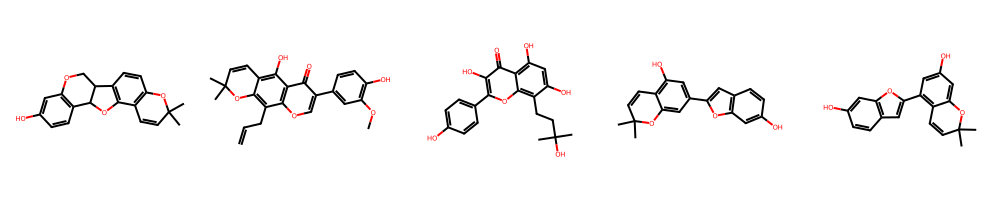

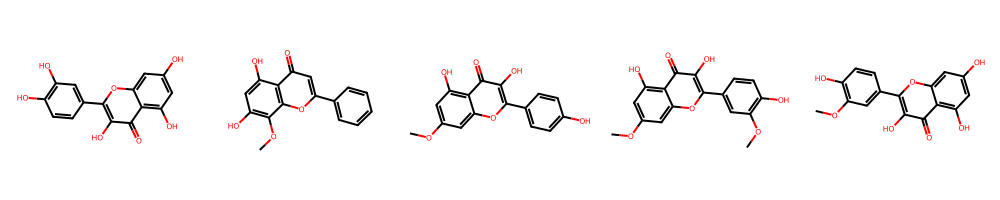

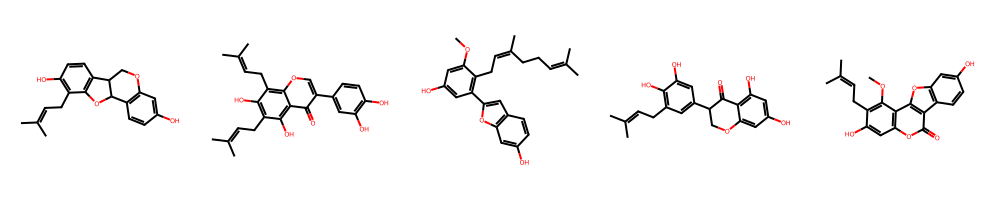

In [11]:
from rdkit.Chem import Draw

for c in range(best_k):
    cluster_mols = [Chem.MolFromSmiles(smi) for smi in df_valid[df_valid['Cluster']==c]['SMILES'].tolist()[:5]]
    img = Draw.MolsToGridImage(cluster_mols, molsPerRow=5, subImgSize=(200,200))
    display(img)


In [14]:
df_valid.to_excel("flavonoid_clusters.xlsx", index=False)
